# Grundläggande analys och statistik

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

plt.rcParams["figure.figsize"] = (9,5)
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.dpi"] = 120
np.set_printoptions(precision=3)
pd.set_option("display.precision", 3)
plt.style.use("ggplot")

In [3]:
# Reading dataset
df = pd.read_csv("../data/health_study_dataset.csv")

# Quick look
display(df.sample(5))
display(df.info())
display(df.describe())

,id,age,sex,height,weight,systolic_bp,cholesterol,smoker,disease
777,778,46,M,187.8,64.6,146.9,3.86,No,0
68,69,55,F,163.6,70.7,146.4,4.87,No,0
326,327,67,F,160.5,60.0,159.1,5.30,No,0
63,64,32,F,167.0,58.9,129.5,2.81,No,0
677,678,76,F,157.2,73.9,149.0,5.11,No,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           800 non-null    int64  
 1   age          800 non-null    int64  
 2   sex          800 non-null    object 
 3   height       800 non-null    float64
 4   weight       800 non-null    float64
 5   systolic_bp  800 non-null    float64
 6   cholesterol  800 non-null    float64
 7   smoker       800 non-null    object 
 8   disease      800 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 56.4+ KB


None

,id,age,height,weight,systolic_bp,cholesterol,disease
count,800.000,800.000,800.000,800.000,800.000,800.000,800.000
mean,400.500,49.426,171.849,73.413,149.179,4.929,0.059
std,231.084,14.501,9.804,13.685,12.793,0.848,0.235
min,1.000,18.000,144.400,33.700,106.800,2.500,0.000
25%,200.750,39.000,164.775,64.800,140.900,4.328,0.000
50%,400.500,50.000,171.350,73.200,149.400,4.970,0.000
75%,600.250,59.000,178.925,82.600,157.600,5.482,0.000
max,800.000,90.000,200.400,114.400,185.900,7.880,1.000


In [4]:
# Cleaning
df.isna().sum()
df.duplicated().sum()

np.int64(0)

## Initial observation

- No missing values or duplicates, 800 rows, 9 columns.

- Data Types: 
    - Numerical continuous: height, weight, systolic_bp, cholesterol
    - Numerical discrete: id, age, disease
    - Categorical: sex, smoker

- Range and distribution:
    - Age ranges from 18 to 90, with a mean around 49 years
    - Height and weight have reasonable ranges for adults
    - Blood pressure and cholesterol also have plausible ranges.

## Beskrivande analys

In [5]:
# Calculating and showing mean, median, min and max for age, weight, height, systolic_bp and cholesterol.
desc_stat = df[["age","weight","height","systolic_bp","cholesterol"]].agg(["mean", "median", "min", "max"])
print(desc_stat)

           age   weight   height  systolic_bp  cholesterol
mean    49.426   73.413  171.849      149.179        4.929
median  50.000   73.200  171.350      149.400        4.970
min     18.000   33.700  144.400      106.800        2.500
max     90.000  114.400  200.400      185.900        7.880


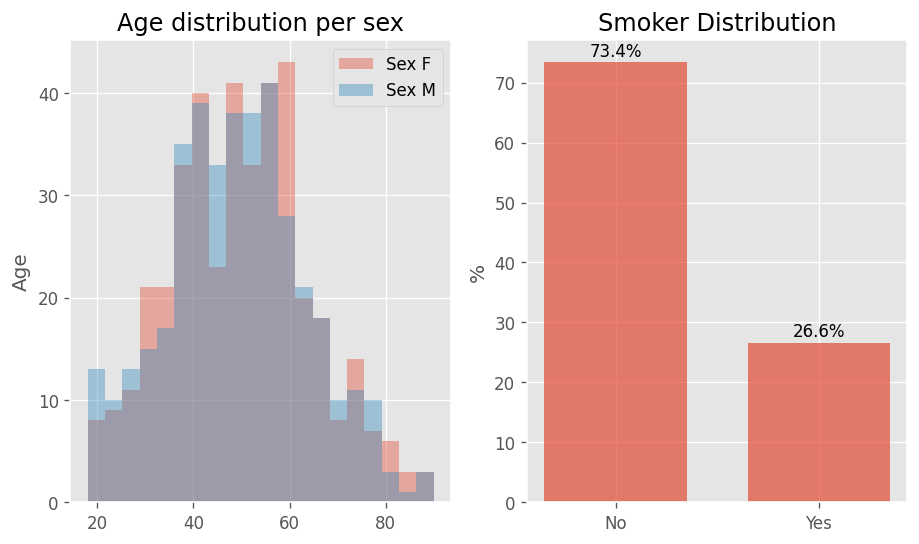

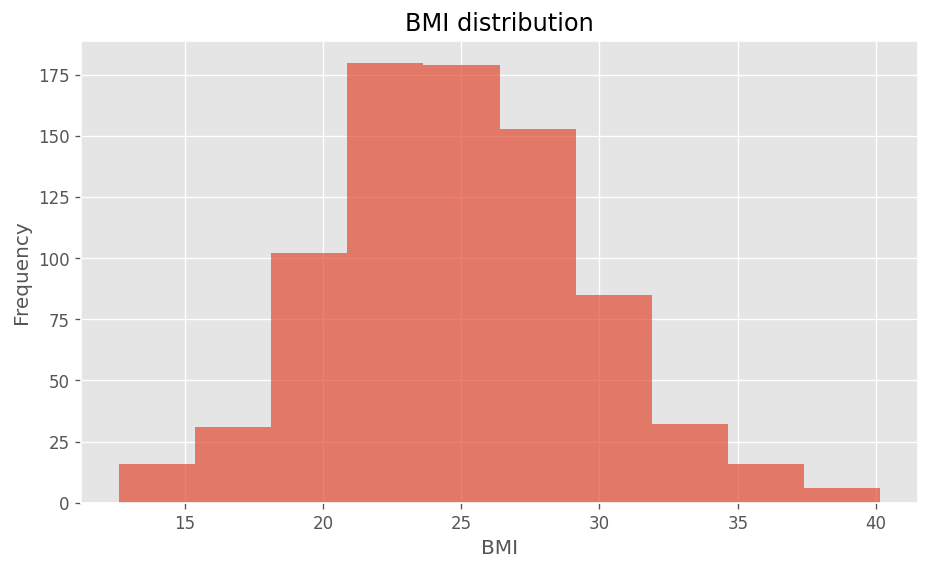

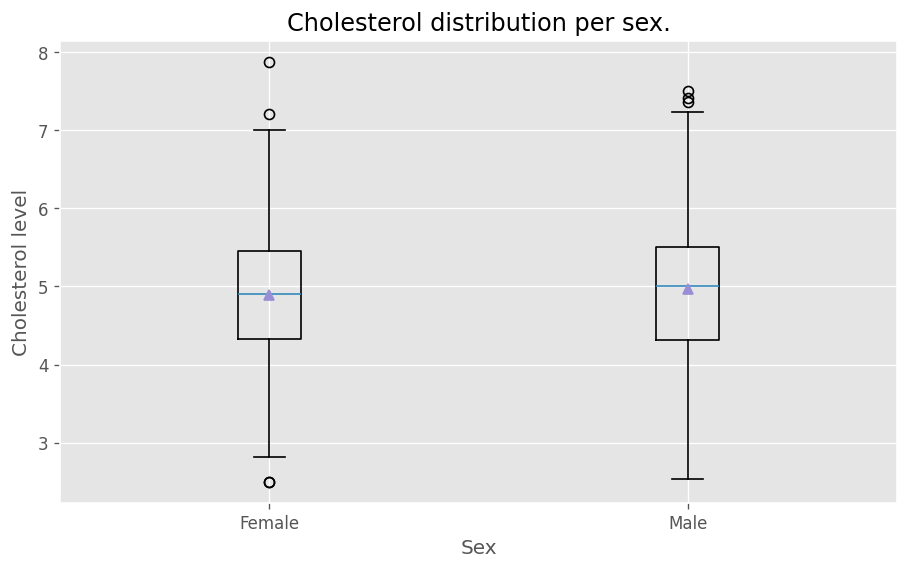

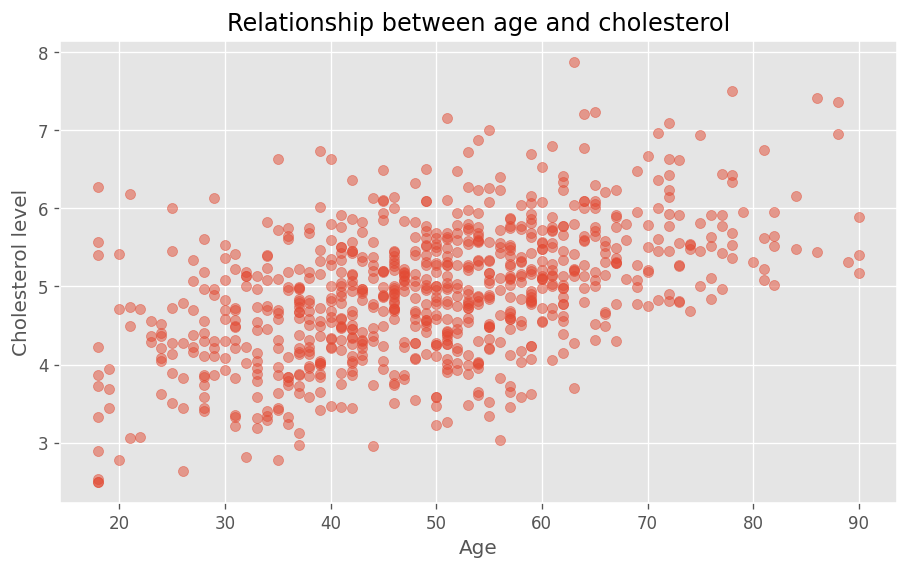

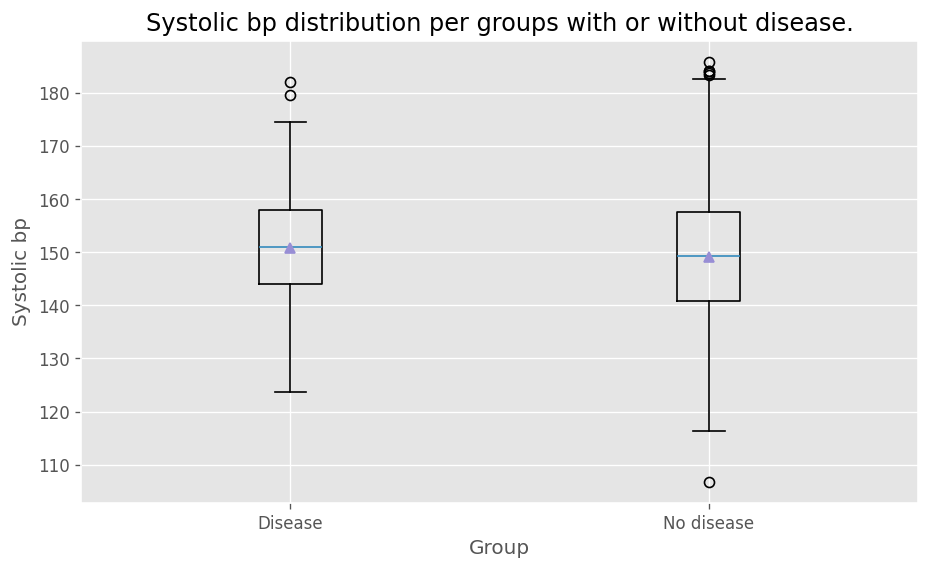

In [10]:
# 1. Understanding sample population
# Histograms: age distribution by gender
fig1, (ax1, ax2) = plt.subplots(1, 2)
for s, subset in df.groupby("sex"):
    ax1.hist(subset["age"], bins=20, label=f"Sex {s}", alpha=0.4)
ax1.set_title("Age distribution per sex")
ax1.set_xlabel("")
ax1.set_ylabel("Age")
ax1.legend()

# Bar chart: percentage of smokers
smoker_per = df["smoker"].value_counts(normalize=True) * 100
ax2.bar(smoker_per.index, smoker_per.values, width=0.7, alpha=0.7)
ax2.set_title("Smoker Distribution")
ax2.set_xlabel("")
ax2.set_ylabel("%")
for i, v in enumerate(smoker_per.values):
    ax2.text(i, v + 1, f"{v:.1f}%", ha='center')
plt.show()

# 2. Examine basic health metrics
# BMI histogram to show distribution of weight
df["bmi"] = df["weight"] / (df["height"] / 100)**2
fig, ax = plt.subplots()
ax.hist(df["bmi"], bins=10, alpha=0.7)
ax.set_title("BMI distribution")
ax.set_xlabel("BMI")
ax.set_ylabel("Frequency")
plt.show()

# Box plots of cholesterol per gender - Purpose: Understand cholesterol spread and detect high-risk individual
fig, ax = plt.subplots()
ax.boxplot([df.loc[df.sex == "F", "cholesterol"], 
           df.loc[df.sex == "M", "cholesterol"]], 
           tick_labels=["Female", "Male"], 
           showmeans=True)
ax.set_title("Cholesterol distribution per sex.")
ax.set_xlabel("Sex")
ax.set_ylabel("Cholesterol level")
plt.show()

# 3. Exploring relationship between variables 
# scatter of age and cholesterol
fig, ax = plt.subplots()
ax.scatter(df["age"], df["cholesterol"], alpha=0.5)
ax.set_title("Relationship between age and cholesterol")
ax.set_xlabel("Age")
ax.set_ylabel("Cholesterol level")
plt.show()

# Systolic BP by Disease - Box Plot: Purpose: Identify if blood pressure is higher on average in people with disease.
fig, ax = plt.subplots()
ax.boxplot([df.loc[df.disease == 1, "systolic_bp"], 
           df.loc[df.disease == 0, "systolic_bp"]], 
           tick_labels=["Disease", "No disease"], 
           showmeans=True)
ax.set_title("Systolic bp distribution per groups with or without disease.")
ax.set_xlabel("Group")
ax.set_ylabel("Systolic bp")
plt.show()

**Simulering kopplad till caset** (använd numpy.random + seed)

- Beräkna andelen personer i datasetet som har sjukdomen.
- Använd numpy för att simulera 1000 slumpade personer med samma sannolikhet för sjukdom.
- Jämför den simulerade andelen med den verkliga andelen i datasetet.

**Konfidensintervall**

- Beräkna ett konfidensintervall för medelvärdet av systolic_bp (t.ex. med normalapproximation eller bootstrap, som vi gått igenom på kursen).


**Hypotesprövning**

- Testa hypotesen: ”Rökare har högre medel-blodtryck än icke-rökare.”
- Använd en av metoderna vi gått igenom (t.ex. bootstrap eller enkel t-test-funktion).
- Förklara kort resultatet i en markdown-ruta.

### **För VG ska du även göra:**

- Beräkna konfidensintervallet med **två olika metoder** (t.ex. normalapproximation och bootstrap) och jämför resultaten.
- Gör en simulering för att undersöka **hur säkert ditt hypotes­test är** (t.ex. hur ofta testet hittar en skillnad när den finns → power).
- Motivera dina metodval i markdown och hänvisa till dokumentation eller annan källa.